## some function used to plot

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_loss_history(loss_history):
    loss_train = np.sum(loss_history.loss_train, axis=1)
    loss_test = np.sum(loss_history.loss_test, axis=1)
    plt.figure(figsize=(10, 8))
    plt.semilogy(loss_history.steps, loss_train, label="Train loss")
    plt.semilogx(loss_history.steps, loss_test, label="Test loss")
    
    for i in range(len(loss_history.metrics_test[0])):
        plt.semilogy(
            loss_history.steps, np.array(loss_history.metrics_test)[:, i], label="Test metric")
    plt.xlabel("Steps")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

## base on a formula

In [2]:
import deepxde as dde
import numpy as np

Using backend: pytorch



Compiling model...
'compile' took 0.000417 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.47e-01]    [2.10e-01]    [1.00e+00]    
1000      [7.09e-05]    [9.52e-05]    [2.14e-02]    
2000      [1.03e-05]    [3.68e-05]    [1.33e-02]    
3000      [6.21e-07]    [2.18e-05]    [1.02e-02]    
4000      [2.87e-07]    [1.89e-05]    [9.52e-03]    
5000      [7.43e-08]    [1.81e-05]    [9.30e-03]    
6000      [2.88e-07]    [1.81e-05]    [9.30e-03]    
7000      [4.73e-06]    [1.98e-05]    [9.74e-03]    
8000      [5.96e-08]    [1.67e-05]    [8.93e-03]    
9000      [7.81e-09]    [1.65e-05]    [8.89e-03]    
10000     [4.35e-06]    [2.16e-05]    [1.02e-02]    

Best model at step 9000:
  train loss: 7.81e-09
  test loss: 1.65e-05
  test metric: [8.89e-03]

'train' took 14.883383 s



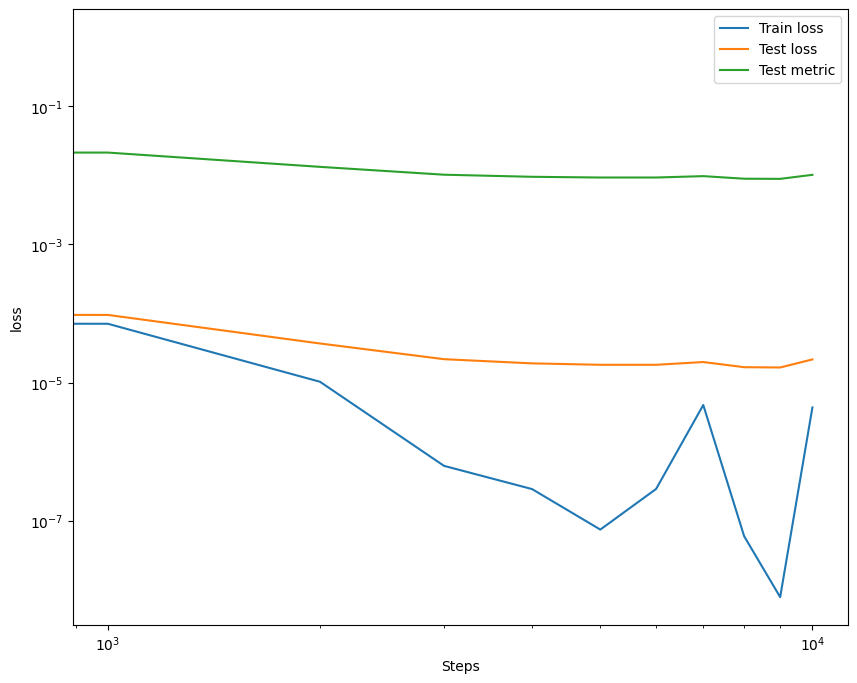

In [15]:
# generate data
def func(x):
    return x * np.sin(5 * x)
geom = dde.geometry.Interval(-1, 1)
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)
# config
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
# train
losshistory, train_state = model.train(iterations=10000)
# dde.saveplot(losshistory, train_state, issave=True, isplot=True)
plot_loss_history(losshistory)

## base on a dataset

Compiling model...
'compile' took 0.000570 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.07e+00]    [1.08e+00]    [1.46e+00]    
1000      [9.28e-03]    [9.20e-03]    [1.34e-01]    
2000      [6.19e-03]    [6.51e-03]    [1.13e-01]    
3000      [5.59e-03]    [5.99e-03]    [1.08e-01]    
4000      [5.25e-03]    [5.71e-03]    [1.06e-01]    
5000      [4.93e-03]    [5.45e-03]    [1.03e-01]    
6000      [4.81e-03]    [5.34e-03]    [1.02e-01]    
7000      [6.46e-03]    [6.69e-03]    [1.15e-01]    
8000      [4.75e-03]    [5.28e-03]    [1.02e-01]    
9000      [5.30e-03]    [5.67e-03]    [1.05e-01]    
10000     [4.74e-03]    [5.33e-03]    [1.02e-01]    
11000     [4.73e-03]    [5.35e-03]    [1.02e-01]    
12000     [4.73e-03]    [5.35e-03]    [1.02e-01]    
13000     [4.71e-03]    [5.41e-03]    [1.03e-01]    
14000     [4.70e-03]    [5.46e-03]    [1.03e-01]    
15000     [4.68e-03]    [5.49e-03]    [1.04e-01]    
16000     [4.04e-03]    [4.95e-03]

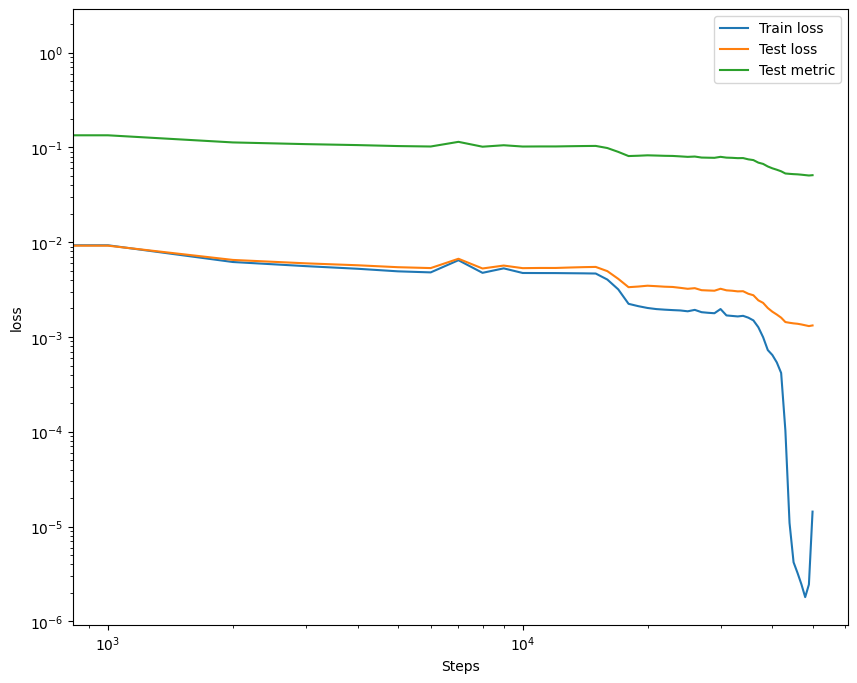

In [17]:
# import dataset
fname_train = "./dataset/dataset.train"
fname_test = "./dataset/dataset.test"
data = dde.data.DataSet(
    fname_train=fname_train, fname_test=fname_test, 
    col_x=(0,), col_y=(1,), standardize=True)

# define the model
layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

#train
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=50000)
plot_loss_history(losshistory)